## End of the distribution imputation

- If the data isn't missing at random and we do not want to expand the feature space what do we do? 

- We impute by values that are at the far end of the distribution of the variable

### Pros

- Easy
- Captures MAR MNAR relations

### Cons

- Distorts distribution 
- If #ofNA is large, we would mask the real outliers 




In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [144]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Titanic

In [146]:
data = data[['Age', 'Fare','Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [147]:
data.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [149]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [150]:
X_train.columns

Index(['Age', 'Fare'], dtype='object')

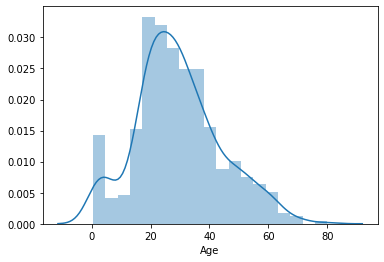

In [151]:
sns.distplot(X_train['Age'])

In [157]:
def impute(df, column, dft):
    df_temp = df.copy()
    df_temp[column] = df_temp[column].fillna(dft[column].mean()+3*dft[column].std())
    return df_temp.values
  

In [158]:
X_train_0 = impute(X_train, 'Age', X_train)
X_test_0 = impute(X_test, 'Age', X_train)

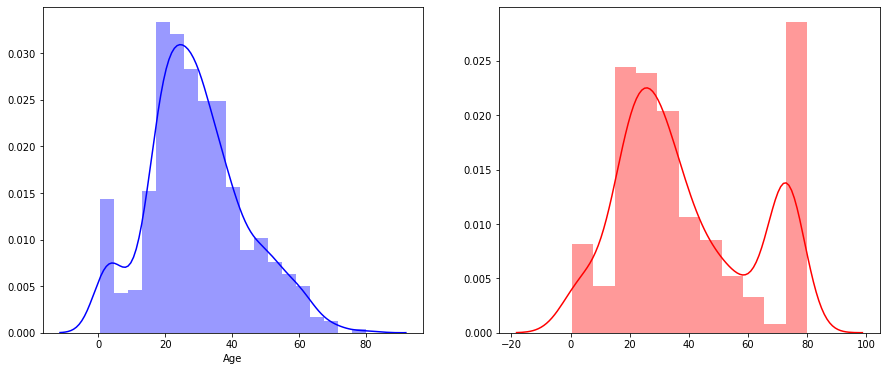

In [162]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_0[:,0], ax = ax[1], color='red')

In [163]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'mean')
X_train_mean = obj.fit_transform(X_train)
X_test_mean = obj.transform(X_test)

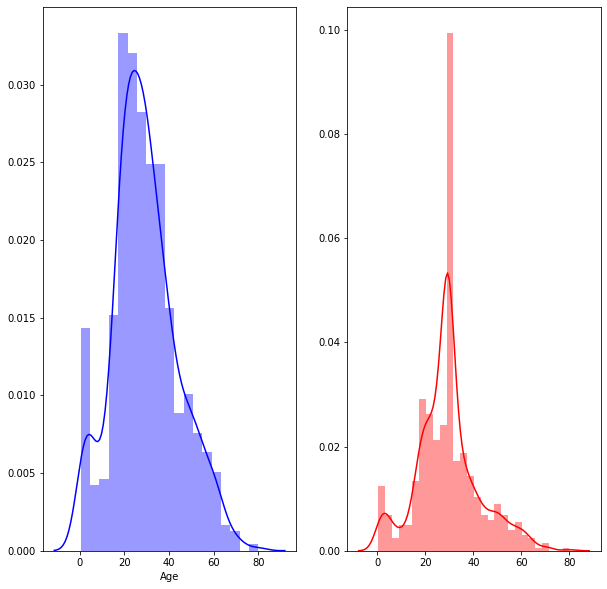

In [164]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mean[:,0], ax = ax[1], color='red')

In [165]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'median')
X_train_median = obj.fit_transform(X_train)
X_test_median = obj.transform(X_test)

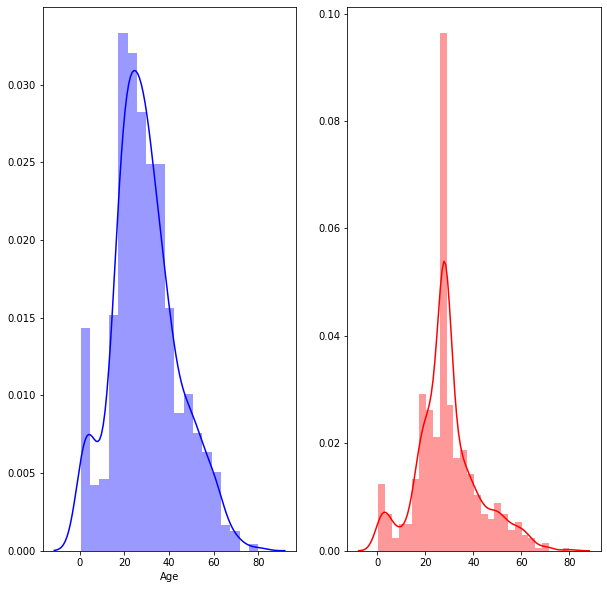

In [166]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_median[:,0], ax = ax[1], color='red')

In [167]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
X_train_mode = obj.fit_transform(X_train)
X_test_mode = obj.transform(X_test)

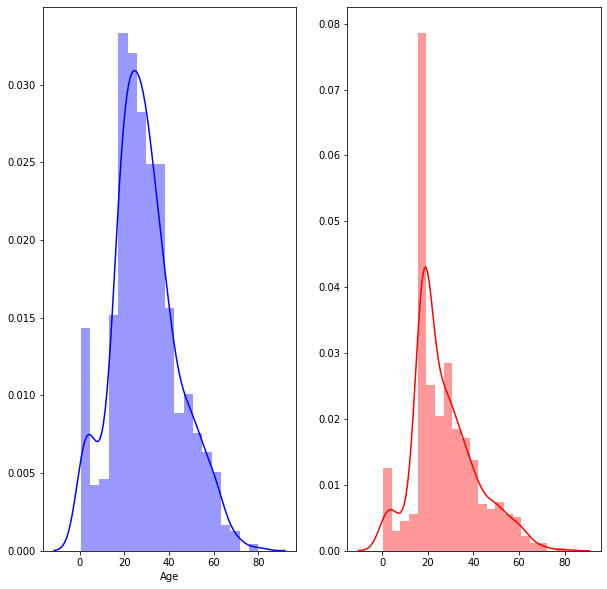

In [168]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mode[:,0], ax = ax[1], color='red')

In [169]:
print('Std original: ', X_train['Age'].std())
print('Std 0: ', X_train_0[:,0].std())
print('Std mean: ', X_train_mean[:,0].std())
print('Std median: ', X_train_median[:,0].std())
print('Std mode: ', X_train_mode[:,0].std())

Std original:  14.53783432285693
Std 0:  21.858119115779775
Std mean:  12.950422650544212
Std median:  12.962487310771373
Std mode:  13.74197270886978


### Model performance 

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6983240223463687
0.6927374301675978
0.6871508379888268
0.6815642458100558


In [172]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6759776536312849
0.6703910614525139
0.6703910614525139
0.6703910614525139


In [173]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6759776536312849
0.6703910614525139
0.6703910614525139
0.6703910614525139


In [174]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.7206703910614525
0.6759776536312849
0.6759776536312849
0.6815642458100558


In [175]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.7206703910614525
0.7206703910614525
0.7039106145251397
0.6871508379888268


In [176]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.36312849162011174
0.6480446927374302
0.7150837988826816
0.659217877094972


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [177]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6983240223463687
0.7094972067039106
0.6927374301675978
0.6927374301675978


In [178]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.659217877094972
0.6480446927374302
0.6033519553072626
0.6368715083798883


In [179]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6983240223463687
0.7206703910614525
0.7150837988826816
0.7094972067039106


In [180]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.35195530726256985
0.6480446927374302
0.7206703910614525
0.5865921787709497


In [181]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.7262569832402235
0.7039106145251397
0.6480446927374302
0.6089385474860335


In [182]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.659217877094972
0.659217877094972
0.664804469273743


In [183]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6759776536312849
0.7206703910614525
0.7039106145251397
0.6871508379888268
